In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('results_mixed.csv')
# Replace all the Nans with 0s
df = df.fillna(0)

In [19]:
methods = df["Attribution Method"].unique()
layers = df["Layer"].unique()
metrics = df["Metric"].unique()
upscale_methods = df["Upscale Method"].unique()
mixing_methods = df["Mixing Method"].unique()

In [20]:
print("Methods:", methods)
print("Layers:", layers)
print("Metrics:", metrics)
print("Upscale Methods:", upscale_methods)
print("Mixing Methods:", mixing_methods)

Methods: ['DeepLiftShap8' 'GradCAMPlusPlus']
Layers: ['features.20' 'features.15' 'features.10' 'features.5']
Metrics: ['road_combined']
Upscale Methods: ['ERFUpsamplingFast' 'bilinearUpsampling']
Mixing Methods: [0 'MultiplierMix']


In [21]:
df

,Image Index,Model,Dataset,Attribution Method,Layer,Metric,Upscale Method,Mixing Method,Value
0,0,VGG11,PascalVOC,DeepLiftShap8,features.20,road_combined,ERFUpsamplingFast,0,0.154956
1,0,VGG11,PascalVOC,DeepLiftShap8,features.20,road_combined,ERFUpsamplingFast,MultiplierMix,0.155418
2,0,VGG11,PascalVOC,DeepLiftShap8,features.15,road_combined,ERFUpsamplingFast,0,0.307099
3,0,VGG11,PascalVOC,DeepLiftShap8,features.15,road_combined,ERFUpsamplingFast,MultiplierMix,0.236749
4,0,VGG11,PascalVOC,DeepLiftShap8,features.10,road_combined,ERFUpsamplingFast,0,0.267864
...,...,...,...,...,...,...,...,...,...
4091,127,VGG11,PascalVOC,GradCAMPlusPlus,features.15,road_combined,bilinearUpsampling,MultiplierMix,0.194673
4092,127,VGG11,PascalVOC,GradCAMPlusPlus,features.10,road_combined,bilinearUpsampling,0,0.238789
4093,127,VGG11,PascalVOC,GradCAMPlusPlus,features.10,road_combined,bilinearUpsampling,MultiplierMix,0.206806
4094,127,VGG11,PascalVOC,GradCAMPlusPlus,features.5,road_combined,bilinearUpsampling,0,0.189811


In [22]:
import sys
sys.path.append('../')

from models import vgg11_PascalVOC
model = vgg11_PascalVOC()

layer_types = {}
types = []
for i, layer in enumerate(layers):
    layer_type = model.features[int(layer.split(".")[-1])].__class__.__name__
    layer_types[layer] = layer_type
    if layer_type not in types:
        types.append(layer_type)

print(types)
print(layer_types)

['MaxPool2d']
{'features.20': 'MaxPool2d', 'features.15': 'MaxPool2d', 'features.10': 'MaxPool2d', 'features.5': 'MaxPool2d'}


ERFUpsamplingFast
      Image Index  Model    Dataset Attribution Method        Layer  \
0               0  VGG11  PascalVOC      DeepLiftShap8  features.20   
2               0  VGG11  PascalVOC      DeepLiftShap8  features.15   
4               0  VGG11  PascalVOC      DeepLiftShap8  features.10   
6               0  VGG11  PascalVOC      DeepLiftShap8   features.5   
32              1  VGG11  PascalVOC      DeepLiftShap8  features.20   
...           ...    ...        ...                ...          ...   
4038          126  VGG11  PascalVOC      DeepLiftShap8   features.5   
4064          127  VGG11  PascalVOC      DeepLiftShap8  features.20   
4066          127  VGG11  PascalVOC      DeepLiftShap8  features.15   
4068          127  VGG11  PascalVOC      DeepLiftShap8  features.10   
4070          127  VGG11  PascalVOC      DeepLiftShap8   features.5   

             Metric     Upscale Method Mixing Method     Value  
0     road_combined  ERFUpsamplingFast             0  0.154956  

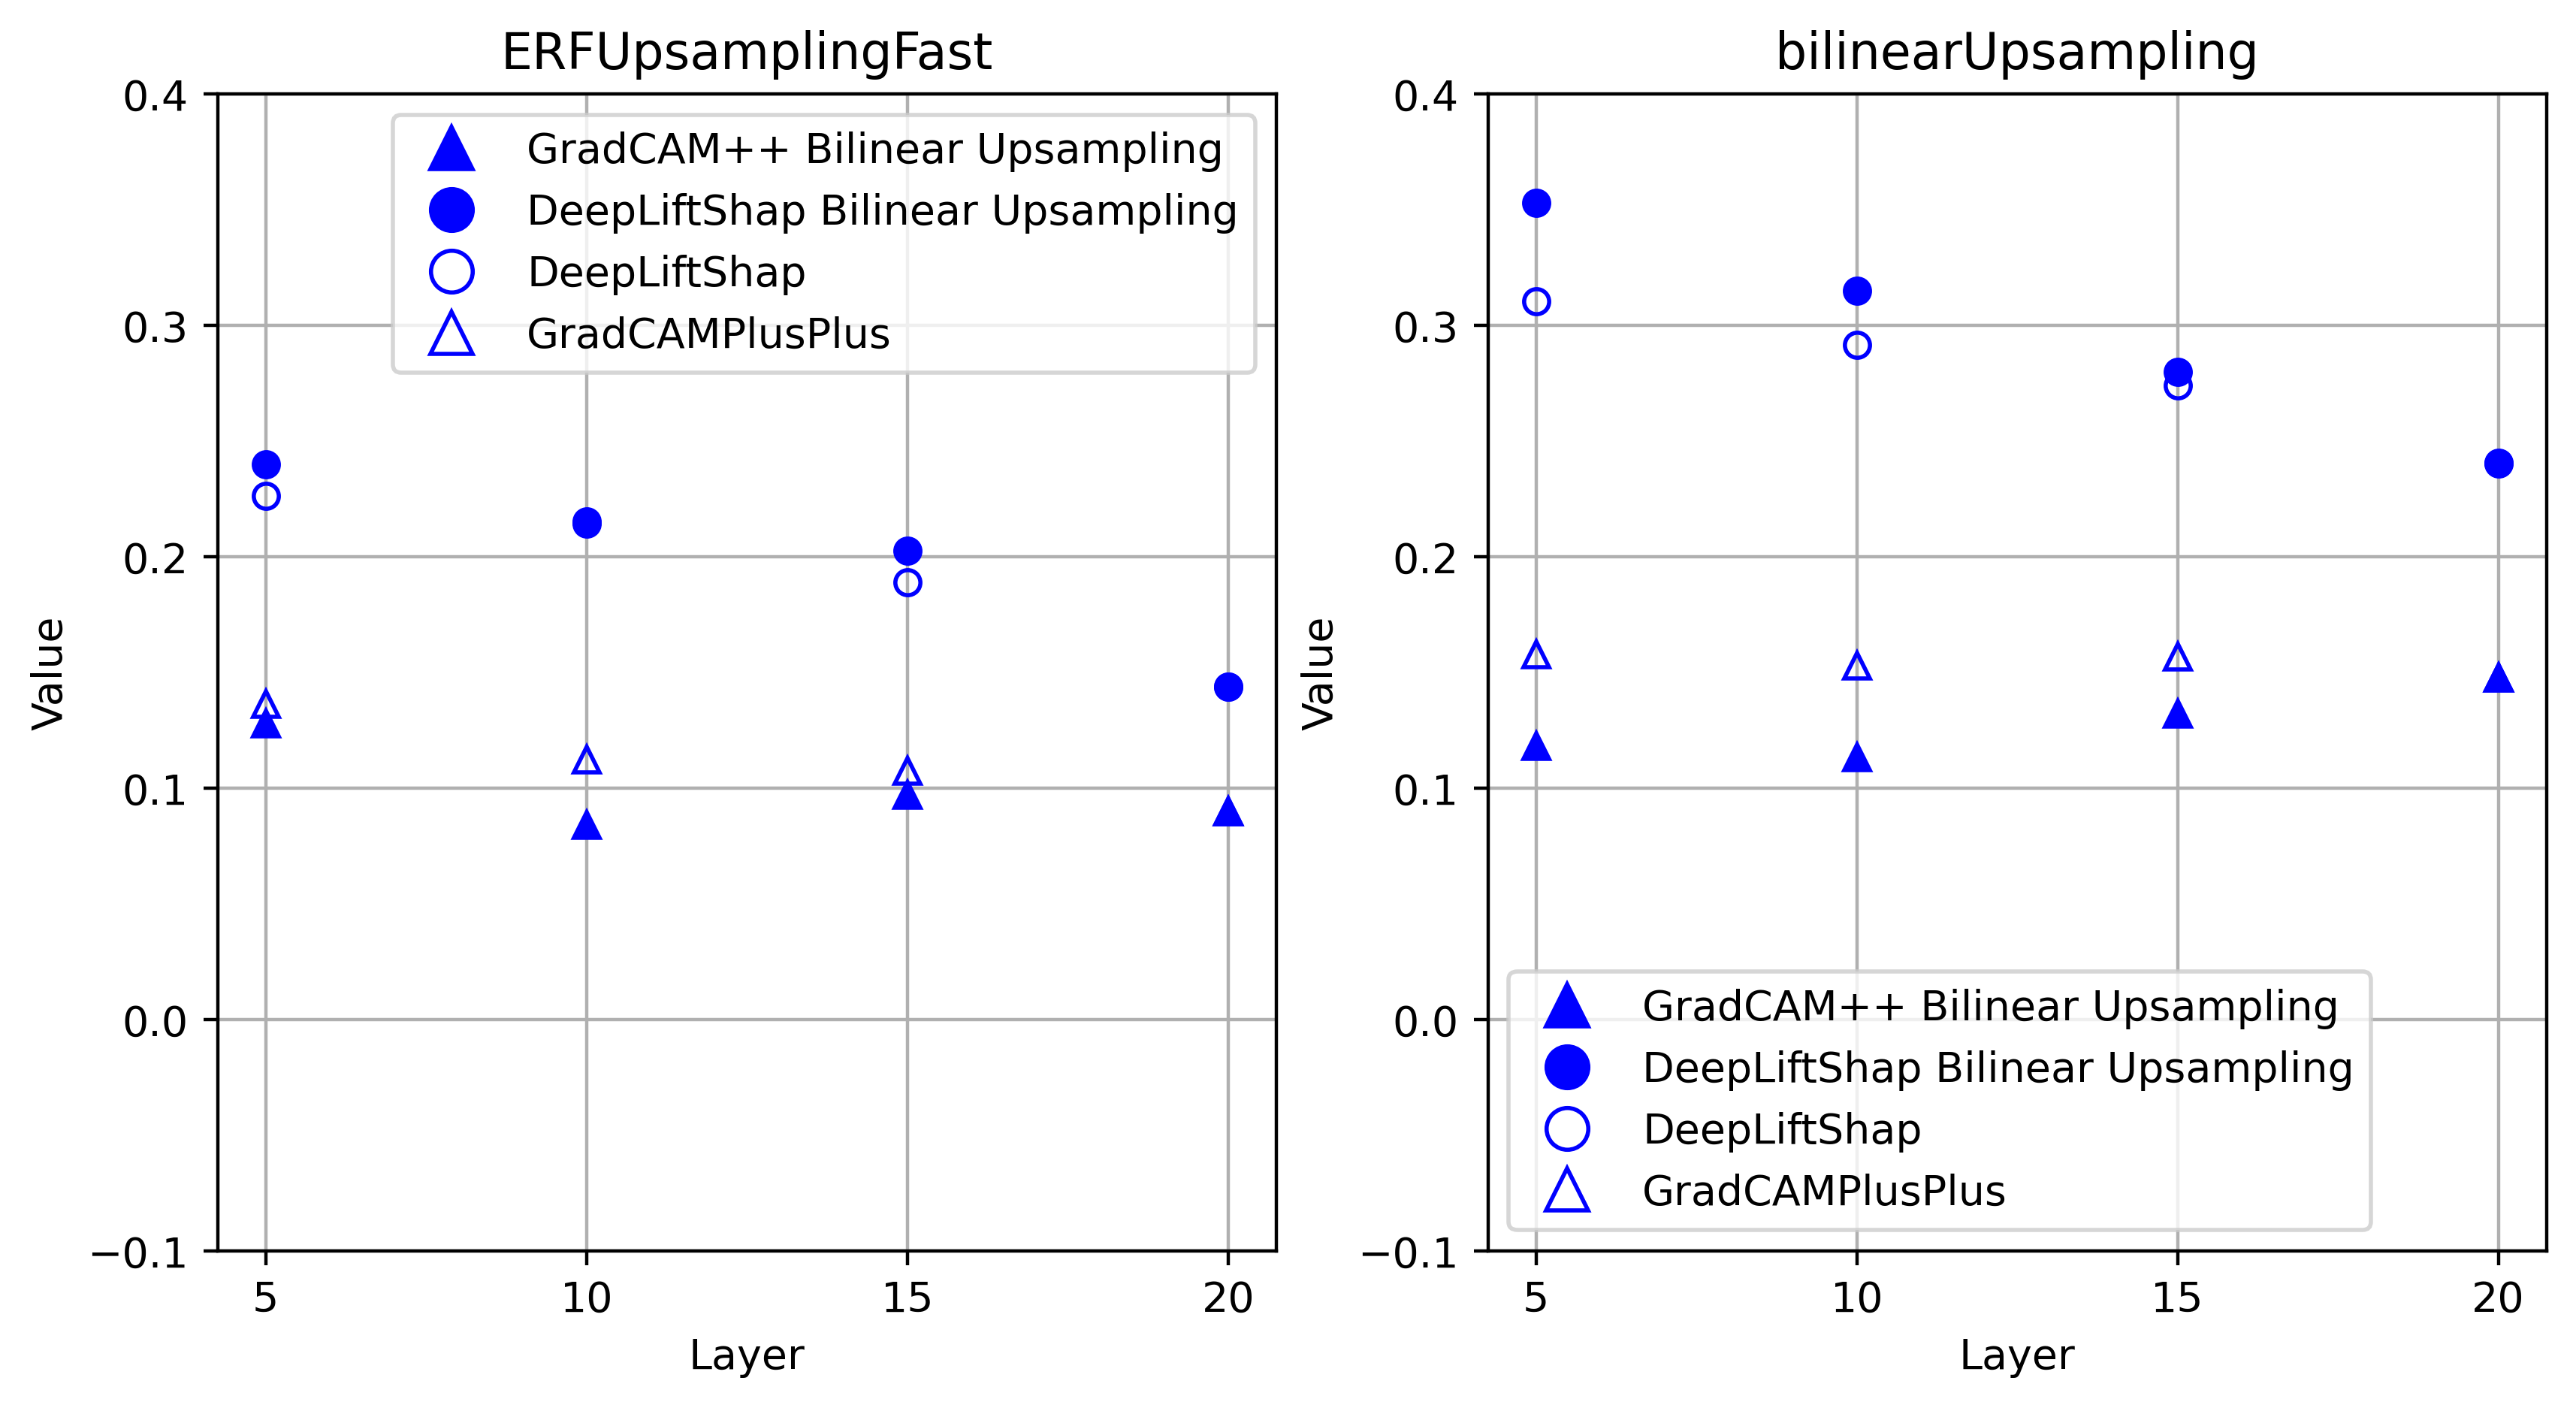

In [52]:
import matplotlib.lines as mlines


color_for_layers = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
# shape_for_upscale = {"ERFUpsampling": "P","SimpleUpsampling": "D"}  # Define shape mapping
shape_for_methods = {"GradCAMPlusPlus": "^","DeepLiftShap8": "o"}  # Define shape mapping

method_names = {"GradCAMPlusPlus": "GradCAM++ Bilinear Upsampling", "DeepLiftShap8": "DeepLiftShap Bilinear Upsampling"}  # Define shape mapping
# upscale_names = {"ERFUpsampling": "ERF Upsampling", "SimpleUpsampling": "Bilinear Upsampling"}  # Define shape mapping
titles = {
    "sensitivity": "Sensitivity (Lower is Better)",
    "infidelity": "Infidelity (Lower is Better)",
    "road_combined": "ROAD (Higher is Better)",
}

fig = plt.figure(figsize=(10,5), dpi=400)

metric = "road_combined"
# fig.text(0.05, 0.75, 'GradCAM++', ha='center', va='center', fontsize=14) # , fontweight='bold')
# fig.text(0.05, 0.25, 'DeepLiftShap', ha='center', va='center', fontsize=14) # , fontweight='bold')

# plt.suptitle('VGG11', fontsize=16)
plt.tight_layout()

for index, upscale in enumerate(upscale_methods):
    print(upscale)
    plt.subplot(1, 2, index + 1)
    plt.title(upscale)
    for metric in metrics:
        for layer_type in types:
            for mix in mixing_methods:
                for j, attr_method in enumerate(methods):
                    res = df[(df["Upscale Method"] == upscale) &
                            (df["Metric"] == metric) &
                            (df["Attribution Method"] == attr_method) & 
                            (df["Mixing Method"] == mix)]
                    print(res)
                    res = res.groupby("Layer").agg({"Value": "mean"}).reset_index()
                    # Extract also the value std
                    print(res)
                    values = [res[res["Layer"] == f"features.{i}"]["Value"].values[0] for i in [5,10,15,20]]
                    # for i in [5,10,15,20]:
                    #     print(res[res["Layer"] == f"features.{i}"]["Value"].values[0])
                    # print(res)
                    # indices = res["Layer"].apply(lambda x: int(x.split(".")[-1]))
                    # print(indices)
                    # indices = [i for i in indices if i >= 10]
                    # values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in range(21)]
                    # values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in indices]
                    # Average the values across each layer
                    # for i in [5,10,15,20]:
                    #     print(values[indices == i])
                    # print(mix)
                    # print(values)
                    # print(indices)
                    # print(shape_for_methods)
                    # print(attr_method)
                    # print(shape_for_methods[attr_method])
                    if mix == "MultiplierMix":
                        # print("SimpleUpsampling")
                        plt.plot([5,10,15,20], values,shape_for_methods[attr_method],markerfacecolor= 'none', color=color_for_layers[types.index(layer_type)])
                    else:
                        plt.plot([5,10,15,20], values,shape_for_methods[attr_method], color=color_for_layers[types.index(layer_type)])
                        # print("ERFUpsampling")

                    plt.xlabel("Layer")
                    plt.ylabel("Value")
                    # Log scale for y
                    if metric == "sensitivity":
                        plt.yscale("log")

                    plt.ylim([-0.1, 0.4])
                    plt.grid(True)


    # Create color legend (Layer Types)
    # color_legend = [mlines.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=layer) 
    #                 for color, layer in zip(color_for_layers, types)]
    color_legend = []

    # Create shape legend (Methods)
    shape_legend = [mlines.Line2D([], [], color='blue', marker=shape, linestyle='None', markersize=10, label=method_names[upscale]) 
                    for upscale, shape in shape_for_methods.items()]
    
    upscale_legend = [mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label="DeepLiftShap", markerfacecolor= 'none'),
                      mlines.Line2D([], [], color='blue', marker='^', linestyle='None', markersize=10, label="GradCAMPlusPlus", markerfacecolor= 'none'),]
    
    plt.xticks([5,10,15,20])
    plt.legend(handles=color_legend + shape_legend + upscale_legend)

plt.savefig('results erf.pdf', dpi=400, bbox_inches='tight')


In [54]:
df[(df["Attribution Method"] == "GradCAMPlusPlus") & (df["Upscale Method"] == "ERFUpsamplingFast")].groupby(["Mixing Method", "Layer"]).agg({"Value": "mean"}).reset_index()

,Mixing Method,Layer,Value
0,0,features.10,0.084150
1,0,features.15,0.097057
2,0,features.20,0.090057
3,0,features.5,0.128018
4,MultiplierMix,features.10,0.112276
5,MultiplierMix,features.15,0.107339
6,MultiplierMix,features.20,0.090002
7,MultiplierMix,features.5,0.136334
